# Scikit-learn Tutorial
## Load a data set
This notebook assumes sklearn v0.22

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from IPython.display import Image

#iris = datasets.load_iris()
digits = datasets.load_digits()
X = digits.data
Y = digits.target

In [2]:
print(X)
X.shape

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


(1797, 64)

In [3]:
Y.shape

(1797,)

<Figure size 432x288 with 0 Axes>

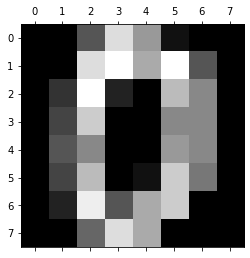

Label: 0


In [4]:
def plot_digit(digit_arr):
    '''Plot a given array of gray pixels'''
    plt.gray() 
    plt.matshow(digit_arr) 
    plt.show() 
plot_digit(digits.images[0])
print('Label:',Y[0])

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X,Y)

In [6]:
dt.predict([X[0,:]])

array([0])

In [7]:
# Probabilities array
dt.predict_proba([X[0,:]])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Accuracy of model

In [8]:
accuracy = sum(dt.predict(X) == Y)/len(Y)
print('Accuracy:', accuracy)

Accuracy: 1.0


This is not a good estimation, as we evaluate on the trained data. Might be affected by overfitting.

Let's try to split the data to train and test sets.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,\
    test_size=0.2, random_state=22)

In [10]:
# Train using train set
dt = DecisionTreeClassifier().fit(X_train,y_train)

In [11]:
accuracy = sum(dt.predict(X_train) == y_train)/len(y_train)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [12]:
accuracy = sum(dt.predict(X_test) == y_test)/len(y_test)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.85


### Confusion matrix

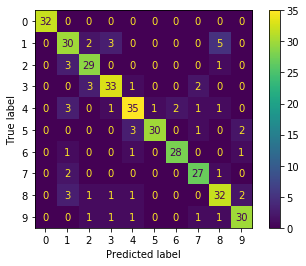

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, normalize=None)

## Plot decistion tree

In [14]:
def plot_small_tree(dt):
    from six import StringIO
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    #graph.set_size('"500,500!"')
    return Image(graph.create_png())

In [15]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
def plot_tree(dt):
    '''Given a decision tree, return a graphiz object of the tree'''
    dot_data = export_graphviz(dt,
                                out_file=None,
                                filled=True,
                                rounded=True)

    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    #pydot_graph.set_size('"5,5!"')
    gvz_graph = graphviz.Source(pydot_graph.to_string())
    return gvz_graph

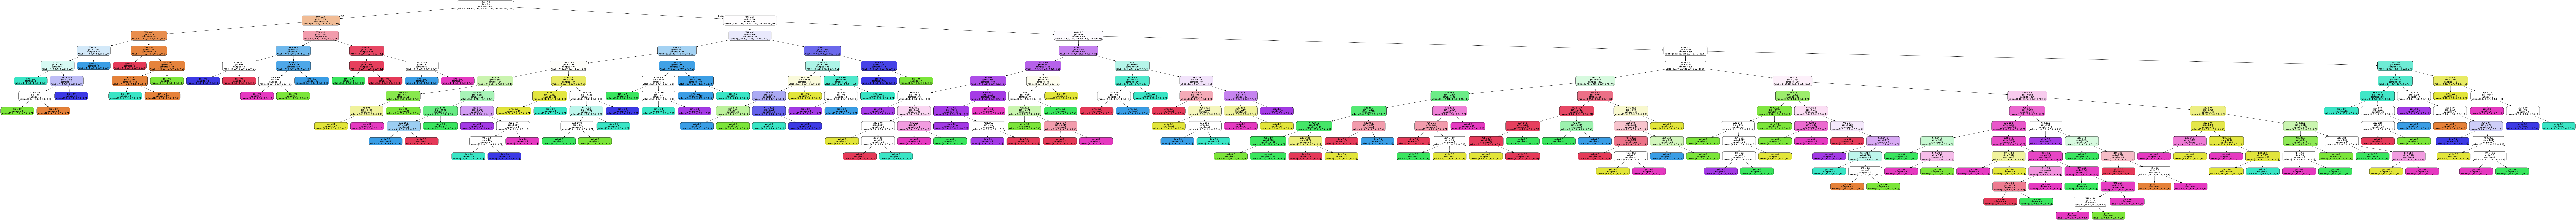

In [16]:
plot_small_tree(dt)

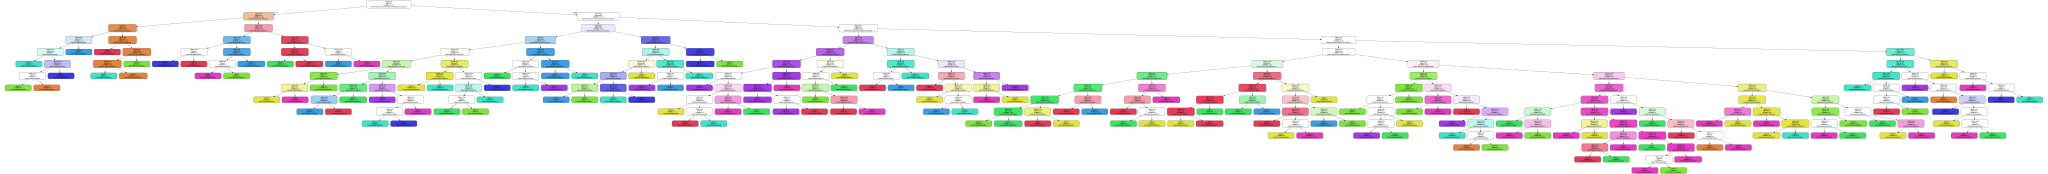

In [17]:
plot_tree(dt)

## Limit tree size

In [18]:
# criterion can accept 'gini' or 'entropy'
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,
                            min_samples_split=2)
dt.fit(X_train, y_train)
accuracy = sum(dt.predict(X_test) == y_test)/len(y_test)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.5


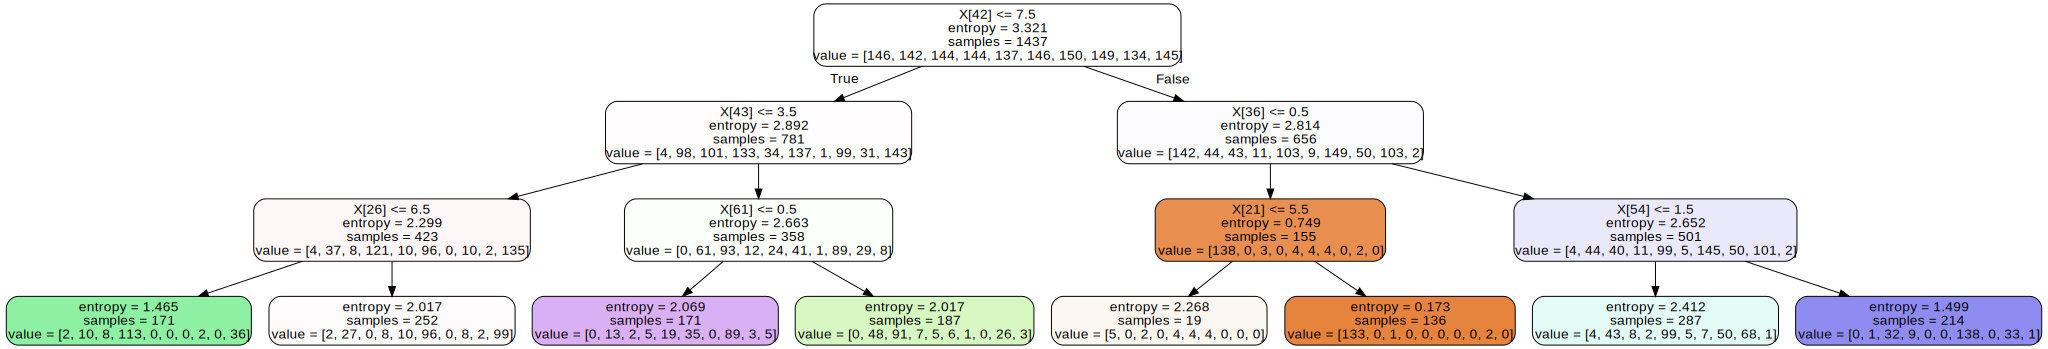

In [19]:
plot_tree(dt)

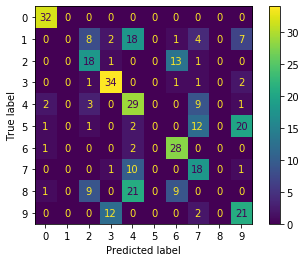

In [20]:
plot_confusion_matrix(dt, X_test, y_test, normalize=None)

<Figure size 432x288 with 0 Axes>

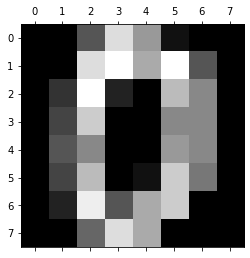

Predicted: [0] Label: 0


<Figure size 432x288 with 0 Axes>

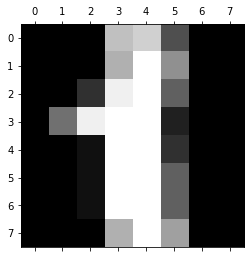

Predicted: [2] Label: 1


<Figure size 432x288 with 0 Axes>

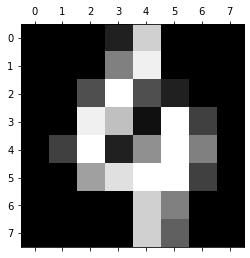

Predicted: [4] Label: 4


<Figure size 432x288 with 0 Axes>

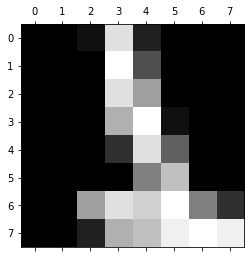

Predicted: [3] Label: 1


In [21]:
for i in (0,1,100,1000):
    plot_digit(digits.images[i])
    print('Predicted:',dt.predict([X[i,:]]), 'Label:',Y[i])

# Grid search

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameters={'min_samples_split' : range(2,100,2),\
            'max_depth': range(1,30,2),
           'criterion': ('gini', 'entropy')}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf = clf.fit(X_train,y_train)

### Best parameters

In [23]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}


In [24]:
dt_model = clf.best_estimator_
# Fit the best algorithm to the data. 
#clf.fit(X_train, y_train)
print(accuracy_score(y_test, dt_model.predict(X_test)))

0.8694444444444445


In [25]:
import pandas as pd
scores = pd.DataFrame(clf.cv_results_)

Text(0.5, 0, 'Min samples split')

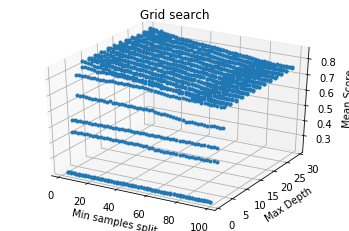

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(scores['param_min_samples_split'], 
         scores['param_max_depth'], 
         scores['mean_test_score'],
         '.')
ax.set_title('Grid search')
ax.set_zlabel('Mean Score')
ax.set_ylabel('Max Depth')
ax.set_xlabel('Min samples split')